##### REI602M Machine Learning - Homework 1
### Due: Sunday 20.1.2019

**Objectives**: Python starter, Matplotlib, NumPy, stochastic gradient descent, regression

**Name**: Emil Gauti Friðriksson, **email: ** egf3@hi.is, **collaborators:**

Please provide your solutions by filling in the appropriate cells in this notebook, creating new cells as needed. Hand in your solution on Gradescope (instructions will be posted on Piazza). Make sure that you are familiar with the course rules on collaboration (encouraged) and copying (very, very, bad!) 

1) [Python warmup, 15 points] The following code implements the matrix-vector product $y=Ax$ where $A$ is an $n \times m$ matrix, $x$ is a column vector with $m$ elements and $y$ a column vector with $n$ elements, $y_i = \sum_{k=1}^m A_{ik}x_k$. (Note that in practice one would use NumPy's `dot` function to perform the multiplication).

In [1]:
import numpy as np

def matvecmul(A,x):
    n, m = A.shape
    assert(m == x.shape[0])
    y=np.zeros(n)
    for i in range(0, n):
        for j in range(0, m):
            y[i] = y[i] + A[i,j]*x[j]
    return y

# Test:
A=np.array([ [1,2],[3,4] ])
x=np.array([5, 41])
print(matvecmul(A,x))

[ 87. 179.]


a) Write a Python function which computes the sum of each row in the matrix $A$, i.e. $y_i = \sum_{j=1}^m A_{ij},~i=1,\ldots,m$, by accessing individual matrix/vector elements directly as is done in the `matvecmul` function above.


In [2]:
def rowsum(A):
    n, m = A.shape
    y=np.zeros(n)
    for i in range(0,n):
        for j in range(0,m):
            y[i] = y[i] + A[i,j]
    return y
# Test:
A=np.array([ [1,2],[3,4] ])
print(rowsum(A))

[3. 7.]


b) Modify your function so that only positive elements are included in the sum, again by accessing individual matrix elements.

In [3]:
def rowsumpos(A):
    n, m = A.shape
    y=np.zeros(n)
    for i in range(0,n):
        for j in range(0,m):
            if A[i,j]>0:
                y[i] = y[i] + A[i,j]
    return y
# Test:
A=np.array([ [1,-4,2],[1,-3,4] ])
print(rowsumpos(A))

[3. 5.]


c) Use the matrix-times vector code above to compute the matrix product $C=AB$ where $A$ is $n \times m$, $B$ is $m \times p$ and $C_{ij} = \sum_{k=1}^m A_{ik} B_{kj}$.

In [4]:
def matmul(A,B):
    n, m = A.shape
    m2, p= B.shape
    assert(m == m2)
    C=np.zeros((n,p))
    for i in range(0, n):
        for j in range(0, m):
            for k in range(0,m):
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
    return C

# Test:
A=np.array([ [1,2,3],[3,4,5],[1,3,6] ])
B=np.array([ [5,41,55],[5,2,32],[1,2,3] ])
print(matmul(A,B))

[[ 18.  51. 128.]
 [ 40. 141. 308.]
 [ 26.  59. 169.]]


2) [NumPy warmup, 15 points] Repeat a), b) and c) in 1) using NumPy functionality. Aim for fast code by avoiding for-loops as much as possible.

In [5]:
def rowsum(A):
    return np.sum(A,axis=1)

def rowsumpos(A):
    A2=A.copy()
    A2[A2<0]=0
    return np.sum(A2,axis=1)
    
def matmul(A,B):
    return np.asmatrix(A)*np.asmatrix(B)
    
# Test
A=np.array([ [-10,2],[3,-4] ])
B=np.array([ [5,55],[5,2] ])
print(rowsum(A))
print(rowsumpos(A))
print(matmul(A,B))

[-8 -1]
[2 3]
[[ -40 -546]
 [  -5  157]]


3) [Polynomial regression, 30 points] The `Motorcycle` dataset consists of measurements of the acceleration of the head of a motorcycle rider as a function of time in the first moments after an impact during a simulated motorcycle crash. The $x$-values denote time (in milliseconds) after the impact and the response $y$ is the head acceleration (in g's). The dataset contains 133 measurements of the simulated crash.

a) Create a figure showing the relationship between the input and output variables (data visualization should be the first step in every data analysis tasks). Why is a linear model not appropriate?

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import csv


x, y = np.loadtxt('Motorcycle.csv', delimiter='\t', unpack=True,skiprows=1)

plt.plot(x,y)
plt.xlabel('Tími[ms]')
plt.ylabel('Hröðun(g)[9.8m/s^2]')
plt.title('Hröðun sem fall af tíma')
plt.show()

<Figure size 640x480 with 1 Axes>

**Answer:** We see that a linear model is not really acceptable here as the data is not linear. It is too chaotic. To approximate this you would need polynomials of considerably higher orders.

b) Write a function which performs a least-squares polynomial fit of the data in $y$, given observations in $x$ and degree $d$,
$$
f_\theta(x) = \theta_0 + \theta_1 x + \ldots + \theta_d x^d
$$
by solving the normal equations, $X^T X \theta = X^T y$ (see workbook `vika_01.ipynb` on Piazza). You should start by scaling the $x$-values into the interval $[0, 1]$ to avoid numerical difficulties during the solution of the least-squares problem.

Plot the mean square error $\frac{1}{n}J(\theta)$ as a function of $d=1,2,\ldots 15$.

Which model do you recommend for this data set?

d = 3
Theta: [   78.58251448  -985.74996085  2215.48633826 -1339.97158306]


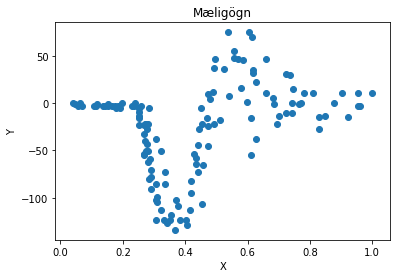

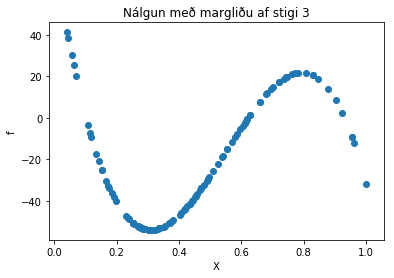

15


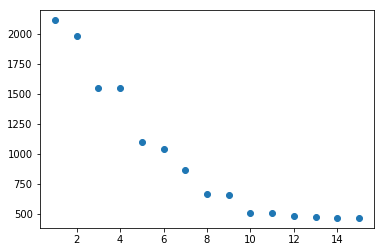

In [12]:
def polyfit(X,y,d):
    n=X.shape[0]
    X2 = np.c_[np.ones(n)]
    for i in range(1,d+1):
        X2=np.c_[X2,X**(i)]
    theta = np.linalg.solve(X2.T.dot(X2), X2.T.dot(y))
    f=0
    for i in range(0,d+1):
        f = f + theta[i]*X**i
    return theta, f
X, y = np.loadtxt('Motorcycle.csv', delimiter='\t', unpack=True,skiprows=1)
X = X/max(X)
d = 3
n=len(X)
theta, f = polyfit(X,y,d)
print("d =",d)
print("Theta:", theta)
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Mæligögn")
plt.show()
plt.xlabel('X')
plt.ylabel('f')
plt.title("Nálgun með margliðu af stigi "+str(d))
plt.scatter(X,f)
plt.show()
J = np.zeros(15)
for k in range(0,15):
    theta, f = polyfit(X,y,k+1)
    for i in range(0,n):
        J[k]=J[k]+1/n*(f[i]-y[i])**2
print(len(J))
s = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.scatter(s,J)




Við sjáum að $J$ er háð $d$ en stærsta villan virðist vera þegar $d=1$ og lægsta villan þegar $d=15$ en þá erum við að 'overfitta' gögnin

4) [Ridge regression and gradient descent, 40 points] Linear regression does not work well when the number of input variables is large with respect to the number of training examples, small perturbations of the data points can have large effects on the model parameters obtained by minimizing the least-squares cost function. In addition, the method cannot handle wide data sets, i.e. data sets with more features than points ($p>n$). Such data sets arise frequently in genomics and imaging studies as well as in other fields. 

_Ridge regression_ overcomes these limitations by adding a so-called regularization component to the squared error, resulting in the following objective function
$$
J(\theta) = \underbrace{\frac{1}{2} \sum_{i=1}^n (f_\theta(x^{(i)}) - y^{(i)})^2}_\text{squared error} + \underbrace{\frac{\lambda}{2} \sum_{j=1}^p \theta_i^2}_\text{regularizer}.
$$
Here $n$ is the size of the training set, $p$ is the number of input variables (features), $x \in \mathbf{R}^p,~ y \in \mathbf{R},~ f_\theta(x)=\sum_{j=1}^p \theta_j x_j$ as before and $\lambda>0$ is a ''regularization'' parameter that needs to be specified. Linear regression is a special case of ridge regression with $\lambda = 0$. With increasing values of $\lambda$ the $\theta$'s "shrink" toward zero since the second term in $J(\theta)$ becomes dominant. This has the effect of reducing the variance in the parameter estimates, i.e. making the parameter estimates less sensitive to fluctuations in the data. At the same time we introduce bias in the model which may lead to decreased prediction accuracy. To obtain a proper balance between bias and variance, the value of $\lambda$ is often selected by using a procedure called cross-validation (more on that later in the course).

*Note 1*: In linear regression we can include the intercept term ($\theta_0$) in the model by introducing a new input variable, $x_0^{(i)}=1$ for $i=1,\ldots,n$. In ridge regression we do not want to penalize for the size of the intercept term and it therefore needs to be treated separately. This is done by transforming the input data as shown on page 64 in ESL. In the following, your model should not include an intercept term.

*Note 2*: The parameter values that minimize $J$ can be obtained directly by solving the following system of linear equations,
$$
(X^T X + \frac{\lambda}{2} I)\theta = X^Ty
$$
where $I$ is the $p \times p$ identity matrix (a matrix with 1s on the diagonal and 0s everywhere else).

a) Create a function `ridge_gd` which implements (batch) gradient descent (GD) for ridge regression. See the lecture notes for details. Use your function to fit a ridge regression model on the form
$$
f_\theta(x)=\sum_{j=1}^p \theta_j x_j
$$
to the `Avertising_scaled` dataset provided with this notebook using $\lambda=100$.

$(\theta_1, \theta_2, \theta_3) =$  (7.40501535, 6.47074348, 3.32874375)

In [8]:
def ridge_gd(X, y, lam):
    p=X.shape[1]
    n=X.shape[0]
    theta=np.zeros(p)
    alpha=0.001
    maxiter=500    
    for k in range(0,maxiter):
        for j in range(0,p):
            error = np.zeros(p)
            for i in range(0,n):
                error = error + (np.dot(theta,X[i,:])-y[i])*X[i,j]
            error = error + lam*theta[j]
            theta[j] = theta[j] - alpha*error[j]
    return theta
data = np.loadtxt('Advertising_scaled.csv', delimiter=',', unpack=False, skiprows=1)
X = data[:,0:-1]
X[:,0] = (X[:,0]-min(X[:,0]))/(max(X[:,0])-min(X[:,0])) # komum X á bilið [0,1]
X[:,1] = (X[:,1]-min(X[:,1]))/(max(X[:,1])-min(X[:,1]))
X[:,2] = (X[:,2]-min(X[:,2]))/(max(X[:,2])-min(X[:,2]))
y = data[:,3]
p = X.shape[1]
lam = 100
theta_ex = np.linalg.solve(X.T.dot(X) + lam/2*np.identity(p), X.T.dot(y))
print("Theta nákvæmt:",theta_ex)
theta = ridge_gd(X,y,lam)
print("Theta nálgað: ",theta, "með lambda =",lam)


Theta nákvæmt: [9.72563232 8.18425398 4.08677798]
Theta nálgað:  [7.40501535 6.47074348 3.32874375] með lambda = 100


b) Create function `ridge_sgd` which implements stochastic gradient descent for ridge regression. Use your function to estimate the parameters in the model above using $\lambda=100$ and an appropriate value of $\alpha$ (you may need experiment with several different values).

$(\theta_1, \theta_2, \theta_3) = $ (8.19799574, 5.69555146, 2.13073679)

*Notes*:
 * Make sure that you select training examples at random. See the lecture notes and the SGD example in workbook `vika_01.ipynb` on Piazza for details.
 * You may need to increase the value of `maxiter`.

In [9]:
def ridge_sgd(X, y, lam, alpha, maxiter=100000):
    p=X.shape[1]
    theta=np.zeros(p)
    error=np.zeros(p)
    
    for j in range(0,p):
        error = np.zeros(p)
        for k in range(0,maxiter):
            i = np.random.randint(n)
            error = error + (np.dot(theta,X[i,:])-y[i])*X[i,j]
            error = error + lam*theta[j]
        theta[j] = theta[j] - alpha*error[j]
    return theta

data = np.loadtxt('Advertising_scaled.csv', delimiter=',', unpack=False, skiprows=1)
X = data[:,0:-1]
X[:,0] = (X[:,0]-min(X[:,0]))/(max(X[:,0])-min(X[:,0])) # komum X á bilið [0,1]
X[:,1] = (X[:,1]-min(X[:,1]))/(max(X[:,1])-min(X[:,1]))
X[:,2] = (X[:,2]-min(X[:,2]))/(max(X[:,2])-min(X[:,2]))
y = data[:,3]
p = X.shape[1]
lam = 100
alpha=0.000012
theta_ex = np.linalg.solve(X.T.dot(X) + lam/2*np.identity(p), X.T.dot(y))
print("Theta nákvæmt:",theta_ex)
theta = ridge_sgd(X,y,lam, alpha)
print("Theta nálgað: ",theta)


Theta nákvæmt: [9.72563232 8.18425398 4.08677798]
Theta nálgað:  [9.7052331  6.45666699 2.17824335]


c) Create a figure that shows shows the value of $J(\theta)$ after each ITERATION when you apply GD to the `Advertising_scaled` data set. Use the same value of $\lambda$ as before.

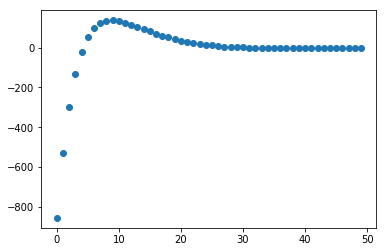

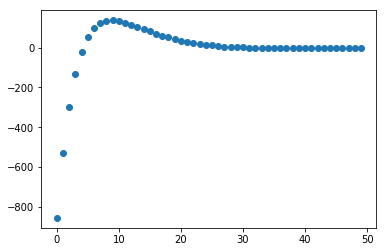

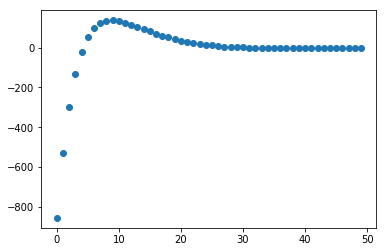

In [10]:
def ridge_gd(X, y, lam,maxiter):

    p=X.shape[1]
    n=X.shape[0]
    theta=np.zeros(p)
    alpha=0.001
    error = np.zeros((maxiter,p))
    for k in range(0,maxiter):
        for j in range(0,p):
            for i in range(0,n):
                error[k,:] = error[k,:] + (np.dot(theta,X[i,:])-y[i])*X[i,j]
            error[k,:] = error[k,:] + lam*theta[j]
            theta[j] = theta[j] - alpha*error[k,j]
    return theta, error



data = np.loadtxt('Advertising_scaled.csv', delimiter=',', unpack=False, skiprows=1)
X = data[:,0:-1]
X[:,0] = X[:,0]/max(X[:,0]) # komum X á bilið [0,1]
X[:,1] = X[:,1]/max(X[:,1])
X[:,2] = X[:,2]/max(X[:,2])
y = data[:,3]
p = X.shape[1]
n = X.shape[0]

lam = 100
maxiter=50
theta, J = ridge_gd(X,y,lam,maxiter)
m = np.arange(maxiter)

plt.scatter(m,J[:,0])
plt.show(True)
plt.scatter(m,J[:,1])
plt.show(True)
plt.scatter(m,J[:,2])
plt.show(True)



d) Create a figure similar to the one in c) for the SGD algorithm but calculate $J(\theta)$ every 100 iteration steps or so.

How does the graph compare to the one you obtained in c)? Discuss briefly whether you should always select the parameter values from the latest iteration when using this algorithm.

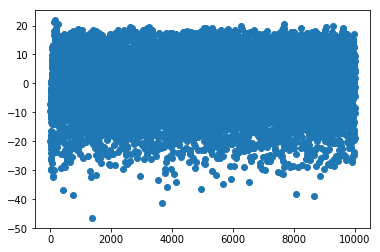

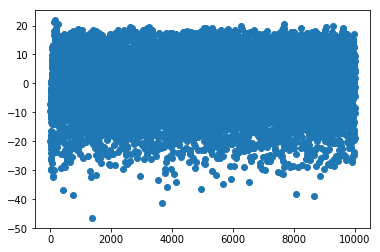

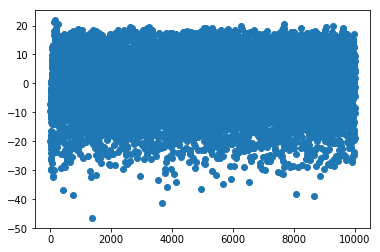

In [11]:
def ridge_sgd(X, y, lam, alpha, maxiter):
    p=X.shape[1]
    theta=np.zeros(p)
    error = np.zeros((maxiter,p))
    for j in range(0,p):
        for k in range(0,maxiter):
            i = np.random.randint(n)
            error[k,:] = error[k,:] + (np.dot(theta,X[i,:])-y[i])*X[i,j]
            error[k,:] = error[k,:] + lam*theta[j]
            theta[j] = theta[j] - alpha*error[k,j]
    return theta, error

data = np.loadtxt('Advertising_scaled.csv', delimiter=',', unpack=False, skiprows=1)
X = data[:,0:-1]
X[:,0] = (X[:,0]-min(X[:,0]))/(max(X[:,0])-min(X[:,0])) # komum X á bilið [0,1]
X[:,1] = (X[:,1]-min(X[:,1]))/(max(X[:,1])-min(X[:,1]))
X[:,2] = (X[:,2]-min(X[:,2]))/(max(X[:,2])-min(X[:,2]))
y = data[:,3]
p = X.shape[1]
lam = 100
alpha=0.0001
maxiter=10000
theta, J = ridge_sgd(X,y,lam,alpha,maxiter)
m = np.arange(maxiter)

plt.scatter(m,J[:,0])
plt.show(True)
plt.scatter(m,J[:,1])
plt.show(True)
plt.scatter(m,J[:,2])
plt.show(True)
